<a href="https://colab.research.google.com/github/anya10025/DrugResistancePrediction/blob/main/updated_tfl_and_graph_detailed_hands_on_ipynb_Anya_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data from safetyData package

In [1]:
# Step 1: Install required packages
!apt-get install -y r-base
!pip install rpy2

# Step 2: Load R and install the safetyData package
import os

# Set up environment for R installation
os.environ['R_HOME'] = '/usr/lib/R'
os.environ['R_USER'] = '/root'

# Import rpy2 for R-Python integration
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Install safetyData package in R
robjects.r('install.packages("safetyData", repos="http://cran.r-project.org")')

# Step 3: Load the safetyData package
safetyData = importr('safetyData')
robjects.r('library(safetyData)')

# Step 4: Get all SDTM datasets
# List all objects (datasets) in the safetyData package
datasets = robjects.r('data(package="safetyData")$results[, "Item"]')

# Step 5: Load each dataset and convert to pandas dataframe
import pandas as pd
from rpy2.robjects import pandas2ri

pandas2ri.activate()

# Create a dictionary to store all datasets
sdtm_dataframes = {}

# Loop through all SDTM datasets and load them into Python
for dataset_name in datasets:
    try:
        # Load dataset in R
        data = robjects.r(f'{dataset_name}')

        # Convert R dataframe to pandas dataframe
        df = pandas2ri.rpy2py(data)

        # Store in dictionary
        sdtm_dataframes[dataset_name] = df

        print(f"Loaded dataset: {dataset_name}")
    except Exception as e:
        print(f"Could not load dataset {dataset_name}: {e}")

# Step 6: Display the names of loaded datasets
print("Loaded SDTM datasets:")
print(sdtm_dataframes.keys())

# Example: Access a specific dataset (e.g., 'sdtm_dm')
if 'sdtm_dm' in sdtm_dataframes:
    print(sdtm_dataframes['sdtm_dm'].head())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


(as ‘lib’ is unspecified)







	‘/tmp/RtmpicXL8E/downloaded_packages’



Loaded dataset: adam_adae
Loaded dataset: adam_adlbc
Loaded dataset: adam_adlbh
Loaded dataset: adam_adlbhy
Loaded dataset: adam_adqsadas
Loaded dataset: adam_adqscibc
Loaded dataset: adam_adqsnpix
Loaded dataset: adam_adsl
Loaded dataset: adam_adtte
Loaded dataset: adam_advs
Loaded dataset: sdtm_ae
Loaded dataset: sdtm_cm
Loaded dataset: sdtm_dm
Loaded dataset: sdtm_ds
Loaded dataset: sdtm_ex
Loaded dataset: sdtm_lb
Loaded dataset: sdtm_mh
Loaded dataset: sdtm_qs
Loaded dataset: sdtm_relrec
Loaded dataset: sdtm_sc
Loaded dataset: sdtm_se
Loaded dataset: sdtm_suppae
Loaded dataset: sdtm_suppdm
Loaded dataset: sdtm_suppds
Loaded dataset: sdtm_supplb
Loaded dataset: sdtm_sv
Loaded dataset: sdtm_ta
Loaded dataset: sdtm_te
Loaded dataset: sdtm_ti
Loaded dataset: sdtm_ts
Loaded dataset: sdtm_tv
Loaded dataset: sdtm_vs
Loaded SDTM datasets:
dict_keys(['adam_adae', 'adam_adlbc', 'adam_adlbh', 'adam_adlbhy', 'adam_adqsadas', 'adam_adqscibc', 'adam_adqsnpix', 'adam_adsl', 'adam_adtte', 'adam_ad

#TABLES

##Overview of Adverse Events

Review Dataset

In [2]:
 # Check if 'sdtm_dm' dataset exists
if 'adam_adae' in sdtm_dataframes:
    # Load the dataset
    df = sdtm_dataframes['adam_adae']


    # Display basic structure (similar to PROC CONTENTS)
    print("\nStructure:")
    print(df.info())

    # Display column names and data types
    print("\nColumn Names and Data Types:")
    print(df.dtypes)

    # Display first few rows
    print("\nFirst Few Rows:")
    print(df.head())

    ae_data=df


Structure:
<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 1 to 1191
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   1191 non-null   object 
 1   SITEID    1191 non-null   object 
 2   USUBJID   1191 non-null   object 
 3   TRTA      1191 non-null   object 
 4   TRTAN     1191 non-null   float64
 5   AGE       1191 non-null   float64
 6   AGEGR1    1191 non-null   object 
 7   AGEGR1N   1191 non-null   float64
 8   RACE      1191 non-null   object 
 9   RACEN     1191 non-null   float64
 10  SEX       1191 non-null   object 
 11  SAFFL     1191 non-null   object 
 12  TRTSDT    1191 non-null   float64
 13  TRTEDT    1191 non-null   float64
 14  ASTDT     1180 non-null   float64
 15  ASTDTF    1191 non-null   object 
 16  ASTDY     1180 non-null   float64
 17  AENDT     718 non-null    float64
 18  AENDY     718 non-null    float64
 19  ADURN     714 non-null    float64
 20  ADURU     1191 non-null

Summarize AE and Create Overview

In [3]:
# Group by treatment arm and severity, and count the number of adverse events
ae_summary = ae_data.groupby(['TRTA', 'AESEV']).size().reset_index(name='Count')

# Display the summary table
print(ae_summary)

# Summarize data for overview table
overview_table = ae_data.groupby('TRTA').agg(
    Total_AEs=('USUBJID', 'count'),
    Unique_Subjects=('USUBJID', 'nunique'),
    Mild_AEs=('AESEV', lambda x: (x == 'MILD').sum()),
    Moderate_AEs=('AESEV', lambda x: (x == 'MODERATE').sum()),
    Severe_AEs=('AESEV', lambda x: (x == 'SEVERE').sum())
).reset_index()

# Display the overview table
print(overview_table)

                   TRTA     AESEV  Count
0               Placebo      MILD    219
1               Placebo  MODERATE     74
2               Placebo    SEVERE      8
3  Xanomeline High Dose      MILD    306
4  Xanomeline High Dose  MODERATE    139
5  Xanomeline High Dose    SEVERE     10
6   Xanomeline Low Dose      MILD    245
7   Xanomeline Low Dose  MODERATE    165
8   Xanomeline Low Dose    SEVERE     25
                   TRTA  Total_AEs  Unique_Subjects  Mild_AEs  Moderate_AEs  \
0               Placebo        301               69       219            74   
1  Xanomeline High Dose        455               79       306           139   
2   Xanomeline Low Dose        435               77       245           165   

   Severe_AEs  
0           8  
1          10  
2          25  


Visualize Adverse Events

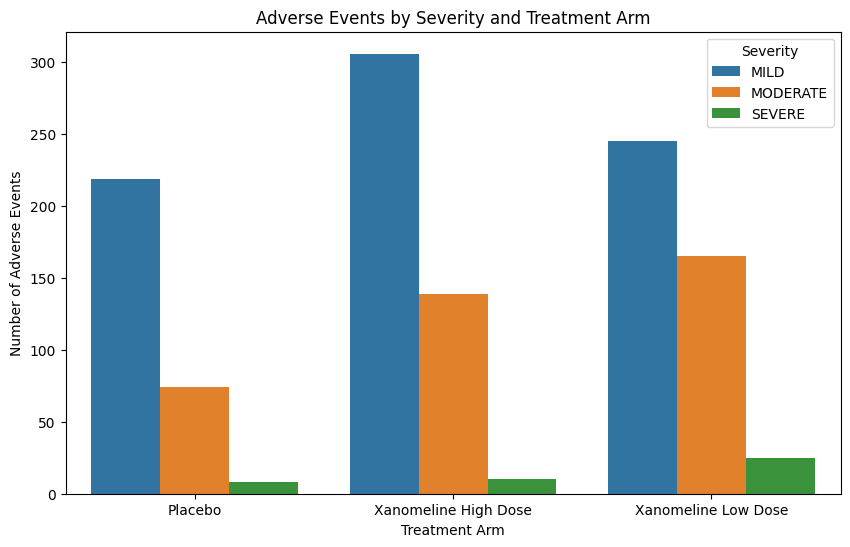

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of adverse events by severity and treatment arm
plt.figure(figsize=(10, 6))
sns.barplot(data=ae_summary, x='TRTA', y='Count', hue='AESEV')
plt.title('Adverse Events by Severity and Treatment Arm')
plt.xlabel('Treatment Arm')
plt.ylabel('Number of Adverse Events')
plt.legend(title='Severity')
plt.show()

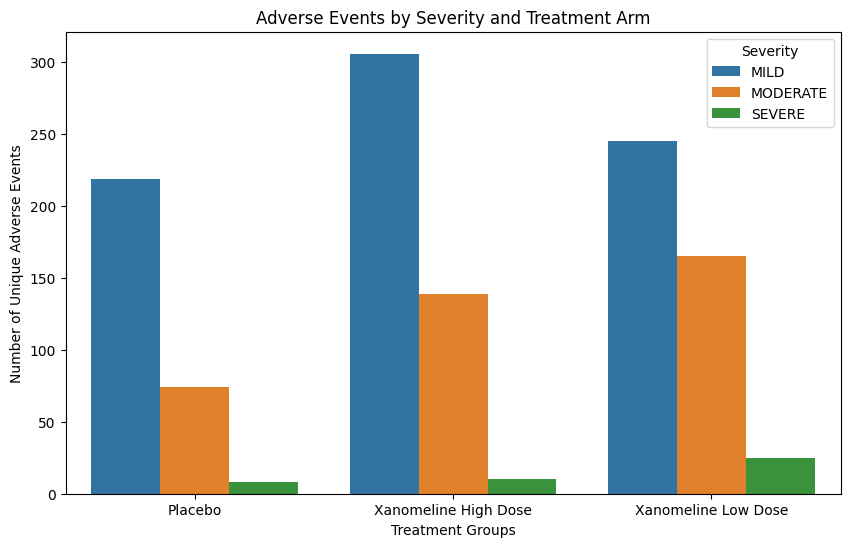

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of adverse events by severity and treatment arm
plt.figure(figsize=(10, 6))
sns.barplot(data=ae_summary, x='TRTA', y='Count', hue='AESEV')
sns.color_palette('muted')
plt.title('Adverse Events by Severity and Treatment Arm')
plt.xlabel('Treatment Groups')
plt.ylabel('Number of Unique Adverse Events')
plt.legend(title='Severity')
plt.show()

saftey population example

In [6]:
 # Check if 'sdtm_dm' dataset exists
if 'adam_adae' in sdtm_dataframes:
    # Load the dataset
    df = sdtm_dataframes['adam_adae']


    # Display basic structure (similar to PROC CONTENTS)
    print("\nStructure:")
    print(df.info())

    # Display column names and data types
    print("\nColumn Names and Data Types:")
    print(df.dtypes)

    # Display first few rows
    print("\nFirst Few Rows:")
    print(df.head())

    ae_data=df


Structure:
<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 1 to 1191
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   1191 non-null   object 
 1   SITEID    1191 non-null   object 
 2   USUBJID   1191 non-null   object 
 3   TRTA      1191 non-null   object 
 4   TRTAN     1191 non-null   float64
 5   AGE       1191 non-null   float64
 6   AGEGR1    1191 non-null   object 
 7   AGEGR1N   1191 non-null   float64
 8   RACE      1191 non-null   object 
 9   RACEN     1191 non-null   float64
 10  SEX       1191 non-null   object 
 11  SAFFL     1191 non-null   object 
 12  TRTSDT    1191 non-null   float64
 13  TRTEDT    1191 non-null   float64
 14  ASTDT     1180 non-null   float64
 15  ASTDTF    1191 non-null   object 
 16  ASTDY     1180 non-null   float64
 17  AENDT     718 non-null    float64
 18  AENDY     718 non-null    float64
 19  ADURN     714 non-null    float64
 20  ADURU     1191 non-null

In [7]:
# Assuming `TRTEMFL` is the flag for treatment-emergent events (values: "Y" for Yes)
saff_data = ae_data[ae_data['SAFFL'] == 'Y']

# Group by treatment arm and severity, and count the number of adverse events
ae_summary = saff_data.groupby(['TRTA', 'AESEV']).size().reset_index(name='Count')

# Display the summary table
print(ae_summary)

# Summarize data for overview table
overview_table = ae_data.groupby('TRTA').agg(
    Total_AEs=('USUBJID', 'count'),
    Unique_Subjects=('USUBJID', 'nunique'),
    Mild_AEs=('AESEV', lambda x: (x == 'MILD').sum()),
    Moderate_AEs=('AESEV', lambda x: (x == 'MODERATE').sum()),
    Severe_AEs=('AESEV', lambda x: (x == 'SEVERE').sum())
).reset_index()

# Display the overview table
print(overview_table)

                   TRTA     AESEV  Count
0               Placebo      MILD    219
1               Placebo  MODERATE     74
2               Placebo    SEVERE      8
3  Xanomeline High Dose      MILD    306
4  Xanomeline High Dose  MODERATE    139
5  Xanomeline High Dose    SEVERE     10
6   Xanomeline Low Dose      MILD    245
7   Xanomeline Low Dose  MODERATE    165
8   Xanomeline Low Dose    SEVERE     25
                   TRTA  Total_AEs  Unique_Subjects  Mild_AEs  Moderate_AEs  \
0               Placebo        301               69       219            74   
1  Xanomeline High Dose        455               79       306           139   
2   Xanomeline Low Dose        435               77       245           165   

   Severe_AEs  
0           8  
1          10  
2          25  


##Treatment Emergent Adverse Events


1. Filter for Treatment-Emergent Events:

The TRTEMFL variable is used to identify treatment-emergent events. Only rows where TRTEMFL == 'Y' are included in the filtered dataset (teae_data).



2. Change Treatment Variable to TRTA:

Replace ARM with TRTA throughout the code to group by treatment arm (TRTA).



3. Create Overview Table for TEAEs:

The teae_overview table summarizes the total number of TEAEs, unique subjects, and counts of TEAEs by severity.

In [8]:
# Filter for treatment-emergent adverse events (TEAEs)
# Assuming `TRTEMFL` is the flag for treatment-emergent events (values: "Y" for Yes)
teae_data = ae_data[ae_data['TRTEMFL'] == 'Y']

# Group by treatment variable (TRTA) and severity (AESEV), and count the number of TEAEs
teae_summary = teae_data.groupby(['TRTA', 'AESEV']).size().reset_index(name='Count')

# Display the summary table for TEAEs
print(teae_summary)

# Create an overview table for TEAEs
teae_overview = teae_data.groupby('TRTA').agg(
    Total_TEAEs=('USUBJID', 'count'),  # Total number of TEAEs
    Unique_Subjects=('USUBJID', 'nunique'),  # Number of unique subjects with TEAEs
    Mild_TEAEs=('AESEV', lambda x: (x == 'MILD').sum()),  # Count of mild TEAEs
    Moderate_TEAEs=('AESEV', lambda x: (x == 'MODERATE').sum()),  # Count of moderate TEAEs
    Severe_TEAEs=('AESEV', lambda x: (x == 'SEVERE').sum())  # Count of severe TEAEs
).reset_index()

# Display the TEAE overview table
print(teae_overview)

                   TRTA     AESEV  Count
0               Placebo      MILD    210
1               Placebo  MODERATE     65
2               Placebo    SEVERE      6
3  Xanomeline High Dose      MILD    294
4  Xanomeline High Dose  MODERATE    129
5  Xanomeline High Dose    SEVERE     10
6   Xanomeline Low Dose      MILD    227
7   Xanomeline Low Dose  MODERATE    160
8   Xanomeline Low Dose    SEVERE     25
                   TRTA  Total_TEAEs  Unique_Subjects  Mild_TEAEs  \
0               Placebo          281               65         210   
1  Xanomeline High Dose          433               76         294   
2   Xanomeline Low Dose          412               77         227   

   Moderate_TEAEs  Severe_TEAEs  
0              65             6  
1             129            10  
2             160            25  


Visualization for TEAEs

In [ ]:
# Bar plot of treatment-emergent adverse events by severity and treatment arm
plt.figure(figsize=(10, 6))
sns.barplot(data=teae_summary, x='TRTA', y='Count', hue='AESEV')
plt.title('Treatment-Emergent Adverse Events by Severity and Treatment Arm')
plt.xlabel('Treatment Arm (TRTA)')
plt.ylabel('Number of TEAEs')
plt.legend(title='Severity')
plt.show()

##Adverse Event by System Organ Class

Create a summary

In [ ]:
# Group by treatment arm (TRTA) and system organ class (AEBODSYS), and count the number of AEs
soc_summary = ae_data.groupby(['TRTA', 'AEBODSYS']).size().reset_index(name='AE_Counts')

# Display the summary table
print(soc_summary)

Create table

In [ ]:
# Create an overview table for SOC
soc_overview = soc_summary.groupby(['TRTA', 'AEBODSYS']).agg(
    Total_AEs=('AE_Counts', 'sum')
).reset_index()

# Display the SOC overview table
print(soc_overview)

Visualize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by AE counts
soc_summary_sorted = soc_summary.sort_values(by='AE_Counts', ascending=False)

# Plot the waterfall chart for SOC by treatment arm
plt.figure(figsize=(12, 6))
sns.barplot(data=soc_summary_sorted, x='AEBODSYS', y='AE_Counts', hue='TRTA', palette='viridis')
plt.title('Waterfall Plot of Adverse Events by System Organ Class and Treatment Arm')
plt.xlabel('System Organ Class (AEBODSYS)')
plt.ylabel('Number of Adverse Events')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Treatment Arm (TRTA)')
plt.show()

#GRAPHS

#Waterfall Plots/Graphs

https://www.storytellingwithdata.com/blog/2020/11/16/what-is-a-waterfall

https://pmc.ncbi.nlm.nih.gov/articles/PMC4093310/


Waterfall plots are a type of bar chart often used in clinical research to visually display individual patient-level data, particularly changes in a measurable outcome (e.g., tumor size, biomarker levels) over time or relative to a baseline. Each bar represents a single patient, and the bars are typically ordered by the magnitude of change, creating a "waterfall" appearance.




Key Features of Waterfall Plots
Individual Patient Representation: Each bar corresponds to a single patient, making it ideal for presenting individual-level data.
Ordered Data: Bars are arranged by the magnitude of change (e.g., largest decrease to largest increase), enabling clear visualization of trends.
Positive and Negative Changes: Bars may extend above or below a baseline (e.g., zero), differentiating between positive and negative changes.
Threshold Indicators: Often includes markers or thresholds (e.g., lines) to indicate clinically meaningful changes (e.g., tumor shrinkage thresholds like 30% for partial response).




Common Uses in Clinical Research
Tumor Response: Visualizing changes in tumor size in oncology trials, where bars show shrinkage or growth relative to baseline.
Biomarker Analysis: Displaying changes in biomarkers or lab values across patients in a study.
Drug Efficacy: Assessing individual patient responses to a treatment, such as reductions in disease activity or symptom severity.
Subgroup Analysis: Comparing responses across different patient subgroups or treatment arms.



Advantages
Individual-Level Insights: Highlights variability in patient responses, allowing researchers to identify outliers or patterns.
Clear Visualization: Easily shows the proportion of patients who meet predefined criteria for response (e.g., tumor shrinkage).
Facilitates Communication: Provides a straightforward and intuitive way to present complex clinical data to stakeholders.
Supports Decision Making: Helps researchers and clinicians assess the effectiveness of treatments across a population.



Limitations
No Statistical Context: Waterfall plots do not provide statistical measures (e.g., confidence intervals, p-values) to support conclusions.
Limited Scalability: Can become visually cluttered and hard to interpret with large datasets.
Focus on Magnitude: May overlook other important dimensions of clinical outcomes, such as time to response or durability.
Potential for Misinterpretation: Ordering bars by magnitude can obscure temporal trends or subgroup differences.
Waterfall plots are particularly useful for oncology trials, where they provide a clear visual summary of treatment responses. However, they should be complemented with other statistical analyses and visualizations for a comprehensive understanding of the data.



##Waterfall Plot for Adverse Events by Subject

This plot can show the number of adverse events experienced by each subject, sorted by the total number of events.

Steps:

Count the number of adverse events (AE) per subject (USUBJID).
Sort subjects by the total count.
Create a waterfall plot of these counts.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of AEs per subject
subject_ae_counts = ae_data.groupby('USUBJID').size().reset_index(name='AE_Counts')

# Sort by AE count
subject_ae_counts = subject_ae_counts.sort_values(by='AE_Counts', ascending=False)

# Plot the waterfall chart
plt.figure(figsize=(12, 6))
sns.barplot(data=subject_ae_counts, x=subject_ae_counts.index, y='AE_Counts', palette='viridis')
plt.title('Waterfall Plot of Adverse Events by Subject')
plt.xlabel('Subjects (Sorted by AE Count)')
plt.ylabel('Number of Adverse Events')
plt.xticks([], [])  # Hide x-axis labels for clarity
plt.show()

##Waterfall Plot for Severity Distribution

This plot can show the cumulative number of adverse events by severity (AESEV), broken down by treatment arm (TRTA).

Steps:

Group data by TRTA and AESEV.
Calculate the cumulative sum of adverse events for each severity level.
Create a stacked waterfall plot.

In [ ]:
# Group by treatment arm and severity, and count the number of AEs
severity_counts = ae_data.groupby(['TRTA', 'AESEV']).size().reset_index(name='Count')

# Sort by treatment and severity
severity_counts = severity_counts.sort_values(by=['TRTA', 'AESEV'])

# Create a cumulative sum column
severity_counts['Cumulative_Count'] = severity_counts.groupby('TRTA')['Count'].cumsum()

# Plot the waterfall chart
plt.figure(figsize=(12, 6))
for trta in severity_counts['TRTA'].unique():
    subset = severity_counts[severity_counts['TRTA'] == trta]
    plt.bar(subset['AESEV'], subset['Count'], label=trta)

plt.title('Waterfall Plot of Adverse Events by Severity and Treatment Arm')
plt.xlabel('Severity')
plt.ylabel('Cumulative Number of Adverse Events')
plt.legend(title='Treatment Arm')
plt.show()

##Waterfall Plot for Treatment-Emergent Adverse Events

This plot can show the change in the number of treatment-emergent adverse events (TEAEs) across subjects or treatment arms.

Steps:

Filter for TEAEs (using TRTEMFL == 'Y').
Group by TRTA and calculate the cumulative number of TEAEs.
Create a waterfall plot.

In [ ]:
# Filter for TEAEs
teae_data = ae_data[ae_data['TRTEMFL'] == 'Y']

# Group by treatment arm and count TEAEs
teae_counts = teae_data.groupby('TRTA').size().reset_index(name='TEAE_Counts')

# Sort by count
teae_counts = teae_counts.sort_values(by='TEAE_Counts', ascending=False)

# Plot the waterfall chart
plt.figure(figsize=(10, 6))
sns.barplot(data=teae_counts, x='TRTA', y='TEAE_Counts', palette='coolwarm')
plt.title('Waterfall Plot of Treatment-Emergent Adverse Events')
plt.xlabel('Treatment Arm')
plt.ylabel('Number of TEAEs')
plt.show()

##Waterfall Plot for System Organ Class (SOC)

This plot can show the number of adverse events per system organ class (AEBODSYS), sorted by frequency.

Steps:

Group data by AEBODSYS and count the number of events.
Sort by the count.
Create a waterfall plot.

In [ ]:
# Group by system organ class and count AEs
soc_counts = ae_data.groupby('AEBODSYS').size().reset_index(name='AE_Counts')

# Sort by AE count
soc_counts = soc_counts.sort_values(by='AE_Counts', ascending=False)

# Plot the waterfall chart
plt.figure(figsize=(12, 6))
sns.barplot(data=soc_counts, x='AEBODSYS', y='AE_Counts', palette='magma')
plt.title('Waterfall Plot of Adverse Events by System Organ Class')
plt.xlabel('System Organ Class')
plt.ylabel('Number of Adverse Events')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

#Spider Plots
https://www.storytellingwithdata.com/blog/2021/8/31/what-is-a-spider-chart


https://pharmasug.org/proceedings/2024/DV/PharmaSUG-2024-DV-186.pdf


Spider Plots Explanation

Spider plots, also known as radar charts or web charts, are graphical representations used to display multivariate data in the form of a two-dimensional chart. They are especially useful for comparing multiple variables or categories across different entities. Each variable is represented as an axis radiating from a central point, and the values for each entity are plotted along these axes, forming a polygon.

Key Features of Spider Plots
Axes: Each axis represents a variable or category, and all axes emanate from a central point.

Scale: The axes typically have a uniform scale, allowing comparisons across variables.

Polygons: The data points are connected to form a polygon, which visually represents the profile of the entity being analyzed.

Comparison: Multiple polygons can be plotted on the same chart to compare different entities.


Common Uses
Performance Analysis: Comparing different products, individuals, or teams based on various metrics.

Survey Results: Visualizing responses to multiple questions in surveys.

Decision Making: Evaluating options based on multiple criteria.


Advantages
Provides a visual summary of multivariate data.
Useful for identifying strengths and weaknesses across variables.
Facilitates easy comparison between entities.
Limitations
Can become cluttered if there are too many variables or entities.
Difficult to interpret if the scales are inconsistent across axes.
Spider plots are often used in fields like business analytics, sports performance evaluation, and scientific research.


In [ ]:
if 'adam_adlb' in sdtm_dataframes:
    # Load the dataset
    df = sdtm_dataframes['adam_adlb']


    # Display basic structure (similar to PROC CONTENTS)
    print("\nStructure:")
    print(df.info())

    # Display column names and data types
    print("\nColumn Names and Data Types:")
    print(df.dtypes)

    # Display first few rows
    print("\nFirst Few Rows:")
    print(df.head())

    adam_adlb=df

##General Spider Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example dataset (replace this with your actual data)
data = {
    'PARAM': ['Heart Rate', 'Blood Pressure', 'Respiratory Rate', 'Weight', 'Temperature'],
    'BASE': [75, 120, 16, 70, 37],
    'CHG': [5, -10, 2, 3, 0.5]
}
df = pd.DataFrame(data)

# Calculate percentage change from baseline (PCHG)
df['PCHG'] = (df['CHG'] / df['BASE']) * 100

# Prepare data for the spider plot
categories = df['PARAM'].tolist()
values = df['PCHG'].tolist()
values += values[:1]  # Repeat the first value to close the circle

# Create the spider plot
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Percentage Change from Baseline')
ax.fill(angles, values, alpha=0.4)

# Add labels and titles
ax.set_yticks(np.arange(-50, 51, 10))  # Adjust based on your data
ax.set_yticklabels(['-50%', '-40%', '-30%', '-20%', '-10%', '0%', '10%', '20%', '30%', '40%', '50%'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title('Spider Plot: Percentage Change from Baseline', size=16, pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()

##Spider Plot of Change from Baseline for Lab Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example dataset (replace with your actual data from adam_adlb)
data = {
    'PARAM': ['Hemoglobin', 'WBC Count', 'Platelet Count', 'Glucose', 'Creatinine'],
    'PCHG': [10, -5, 8, 15, -3],
    'TRTA': ['Treatment A'] * 5
}
df = pd.DataFrame(data)

# Prepare data for the spider plot
categories = df['PARAM'].tolist()
values = df['PCHG'].tolist()
values += values[:1]  # Repeat the first value to close the circle

# Create the spider plot
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Treatment A')
ax.fill(angles, values, alpha=0.4)

# Add labels and titles
ax.set_yticks(np.arange(-50, 51, 10))  # Adjust based on your data
ax.set_yticklabels(['-50%', '-40%', '-30%', '-20%', '-10%', '0%', '10%', '20%', '30%', '40%', '50%'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title('Spider Plot: Percentage Change from Baseline', size=16, pad=20)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()

In [ ]:
for treatment in df['TRTA'].unique():
    group_data = df[df['TRTA'] == treatment]
    # Repeat the plotting steps for each group

    import plotly.express as px
fig = px.line_polar(df, r='PCHG', theta='PARAM', line_close=True)
fig.show()